In [4]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import requests
from KMeans import KMeans

# Lấy data từ api 

### Data year từ  ngày 1-1-2023 -> 27-10-2023 ( Việt Nam)

In [5]:
url = 'https://archive-api.open-meteo.com/v1/archive?latitude=16.1667&longitude=107.8333&start_date=2023-01-01&end_date=2023-10-27&hourly=temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,snowfall,windspeed_10m,winddirection_10m,windgusts_10m&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windgusts_10m_max&timezone=auto'

In [6]:
r = requests.get(url)

In [7]:
data = r.json()
df = pd.DataFrame(data['hourly'])

# Weather Data Description ( Việt Nam)
- temperature_2m :  nhiệt độ với dộ cao là 2m trên mặt đất 
- relativehumidity_2m : độ ẩm
- dewpoint_2m : điểm sương
- precipitation : mưa + tuyết 
- dewpoint_2m : sương mù 
- windspeed_10m : tốc độ gió 
- winddirection_10m : hướng gió 
- windgusts_10m : độ giật

In [8]:
df.isna().sum()

time                    0
temperature_2m         89
relativehumidity_2m    89
dewpoint_2m            89
precipitation          89
snowfall               89
windspeed_10m          89
winddirection_10m      89
windgusts_10m          89
dtype: int64

Kiểm tra các hàng hàng bị null

In [9]:
df[df.isna().any(axis=1)]

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,snowfall,windspeed_10m,winddirection_10m,windgusts_10m
7111,2023-10-24T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7112,2023-10-24T08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7113,2023-10-24T09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7114,2023-10-24T10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7115,2023-10-24T11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7195,2023-10-27T19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7196,2023-10-27T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7197,2023-10-27T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7198,2023-10-27T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# xoá dữ liệu rác 
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7111 entries, 0 to 7110
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 7111 non-null   object 
 1   temperature_2m       7111 non-null   float64
 2   relativehumidity_2m  7111 non-null   float64
 3   dewpoint_2m          7111 non-null   float64
 4   precipitation        7111 non-null   float64
 5   snowfall             7111 non-null   float64
 6   windspeed_10m        7111 non-null   float64
 7   winddirection_10m    7111 non-null   float64
 8   windgusts_10m        7111 non-null   float64
dtypes: float64(8), object(1)
memory usage: 555.5+ KB


Đếm số hàng và cột 

In [12]:
df.shape

(7111, 9)

## Statistics

In [13]:
df['time'] = pd.to_datetime(df['time']).dt.date


In [14]:
df

,time,temperature_2m,relativehumidity_2m,dewpoint_2m,precipitation,snowfall,windspeed_10m,winddirection_10m,windgusts_10m
0,2023-01-01,13.9,90.0,12.3,0.1,0.0,4.7,360.0,16.6
1,2023-01-01,13.9,90.0,12.2,0.1,0.0,5.1,356.0,16.9
2,2023-01-01,13.8,89.0,12.1,0.0,0.0,4.8,347.0,17.6
3,2023-01-01,13.7,89.0,11.9,0.0,0.0,4.7,351.0,17.3
4,2023-01-01,13.7,88.0,11.8,0.0,0.0,4.7,351.0,16.9
...,...,...,...,...,...,...,...,...,...
7106,2023-10-24,19.3,97.0,18.8,0.8,0.0,3.1,249.0,9.0
7107,2023-10-24,19.4,97.0,18.9,0.1,0.0,2.3,288.0,9.0
7108,2023-10-24,19.4,96.0,18.8,0.2,0.0,2.1,301.0,11.9
7109,2023-10-24,19.2,98.0,18.9,0.2,0.0,2.5,278.0,11.2


In [15]:
daily_summary = df.groupby('time').agg({
    'temperature_2m': 'mean',
    'relativehumidity_2m' : 'mean',
    'precipitation': 'sum',
    'windspeed_10m' : ['max','mean'],
    'winddirection_10m' : ['max','mean'],
    'windgusts_10m' :['max','mean'],
}).reset_index()

In [16]:
new_name =  ['time', 'avg_temperature', 'avg_relativehumidity', 'sum_precipitation', 'max_windspeed','avg_windspeed','max_winddirection', 'avg_winddirection','max_windgusts' , 'avg_windgusts' ]

In [17]:
daily_summary.columns = new_name

In [18]:
daily_summary

,time,avg_temperature,avg_relativehumidity,sum_precipitation,max_windspeed,avg_windspeed,max_winddirection,avg_winddirection,max_windgusts,avg_windgusts
0,2023-01-01,14.137500,89.833333,1.8,9.7,6.066667,360.0,346.875000,27.7,20.704167
1,2023-01-02,14.775000,94.750000,3.8,11.2,7.016667,358.0,337.291667,31.7,22.737500
2,2023-01-03,14.975000,96.958333,8.4,10.8,7.637500,360.0,302.291667,29.9,24.795833
3,2023-01-04,15.391667,95.125000,8.8,8.0,5.587500,351.0,117.333333,24.5,19.612500
4,2023-01-05,16.050000,92.416667,14.0,14.6,8.033333,63.0,41.291667,37.8,26.683333
...,...,...,...,...,...,...,...,...,...,...
292,2023-10-20,21.312500,84.458333,3.5,13.2,6.420833,360.0,155.375000,34.6,19.741667
293,2023-10-21,19.779167,88.625000,5.0,15.6,9.237500,358.0,344.916667,43.6,28.770833
294,2023-10-22,20.275000,87.958333,2.7,11.2,6.350000,360.0,288.750000,29.9,19.466667
295,2023-10-23,19.662500,95.791667,26.9,8.8,5.525000,360.0,232.541667,29.5,20.004167


In [76]:
select_df = daily_summary.iloc[:,1:]
select_df

,avg_temperature,avg_relativehumidity,sum_precipitation,max_windspeed,avg_windspeed,max_winddirection,avg_winddirection,max_windgusts,avg_windgusts
0,14.137500,89.833333,1.8,9.7,6.066667,360.0,346.875000,27.7,20.704167
1,14.775000,94.750000,3.8,11.2,7.016667,358.0,337.291667,31.7,22.737500
2,14.975000,96.958333,8.4,10.8,7.637500,360.0,302.291667,29.9,24.795833
3,15.391667,95.125000,8.8,8.0,5.587500,351.0,117.333333,24.5,19.612500
4,16.050000,92.416667,14.0,14.6,8.033333,63.0,41.291667,37.8,26.683333
...,...,...,...,...,...,...,...,...,...
292,21.312500,84.458333,3.5,13.2,6.420833,360.0,155.375000,34.6,19.741667
293,19.779167,88.625000,5.0,15.6,9.237500,358.0,344.916667,43.6,28.770833
294,20.275000,87.958333,2.7,11.2,6.350000,360.0,288.750000,29.9,19.466667
295,19.662500,95.791667,26.9,8.8,5.525000,360.0,232.541667,29.5,20.004167


## Scale data 

In [60]:
X = StandardScaler().fit_transform(select_df)

## Train

Chọn ra 12 tâm ngẫu nhiên 

In [95]:
cluster_centers_  = X[np.random.permutation(X.shape[0])[:12]]

In [139]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
centers = model.cluster_centers_

Công thức tính khoảng cách của nhiều  <br />
 - p,q	=	2 Điểm
- $q_i, p_i$ = các vectors 
- n	=	số phân tử

công thức <br />
$$d(\mathbf {p,q})= \sqrt{\sum \limits_{i=1}^n (q_i-p_i)^2}$$

In [137]:
kmeans._distance(np.array([4,4]), np.array([5, 1]))

3.1622776601683795

Tìm các vị trí nhỏ nhất   <br />
$$\mathbf{y}_i = \arg\min_{\mathbf{y}_i} \sum_{j=1}^K y_{ij}\|\mathbf{x}_i - \mathbf{m}_j\|_2^2 ~~~ (3)$$

In [138]:
labels = [kmeans._nearest(cluster_centers_, x) for x in X]
labels

[9,
 5,
 5,
 4,
 4,
 0,
 4,
 2,
 2,
 2,
 2,
 4,
 9,
 9,
 9,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 8,
 7,
 7,
 8,
 8,
 7,
 7,
 7,
 8,
 9,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 8,
 7,
 7,
 8,
 1,
 7,
 7,
 2,
 2,
 8,
 2,
 2,
 8,
 7,
 2,
 7,
 1,
 1,
 1,
 2,
 3,
 2,
 8,
 1,
 8,
 7,
 1,
 2,
 8,
 7,
 1,
 6,
 6,
 6,
 1,
 1,
 7,
 8,
 8,
 3,
 8,
 8,
 8,
 3,
 3,
 1,
 1,
 6,
 6,
 6,
 6,
 8,
 2,
 2,
 2,
 2,
 2,
 2,
 6,
 10,
 10,
 1,
 6,
 7,
 6,
 6,
 1,
 2,
 2,
 8,
 8,
 8,
 2,
 9,
 6,
 6,
 1,
 2,
 2,
 2,
 2,
 5,
 11,
 0,
 0,
 0,
 0,
 0,
 10,
 6,
 9,
 6,
 5,
 6,
 6,
 6,
 9,
 9,
 1,
 8,
 8,
 2,
 1,
 5,
 6,
 11,
 6,
 9,
 1,
 1,
 1,
 1,
 7,
 1,
 1,
 1,
 9,
 5,
 10,
 10,
 5,
 5,
 1,
 8,
 8,
 8,
 8,
 2,
 2,
 9,
 10,
 0,
 5,
 11,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 10,
 0,
 10,
 10,
 0,
 6,
 1,
 1,
 1,
 1,
 8,
 2,
 9,
 11,
 6,
 11,
 0,
 0,
 10,
 9,
 9,
 9,
 9,
 9,
 9,


Tính trung bình cộng của các điểm <br /> 
 **Với công thức sẽ là**
$$\mathbf{m}_j = \frac{ \sum_{i=1}^N y_{ij} \mathbf{x}_i}{\sum_{i=1}^N y_{ij}}$$ 
$m_j$ là trung bình cộng của các điểm trong cluster $j$


In [130]:
indices = [[i for i, l in enumerate(labels) if l == j]
                        for j in range(12)]

In [134]:
X_by_cluster = [X[i] for i in indices]
[c.sum(axis=0) / len(c) for c in X_by_cluster]

[array([ 0.28798922, -0.71952288, -0.19460577,  2.14349995,  2.15425283,
        -0.4119366 ,  0.40573472,  2.23768752,  2.27110977]),
 array([ 0.81384982, -0.68868192, -0.04001651, -0.83881797, -0.67316904,
         0.59157646,  0.34552636, -0.93582589, -0.51042899]),
 array([-0.02581886,  0.89081922,  0.92502632, -0.80536065, -0.88483387,
         0.87500034,  0.20914717, -0.54061929, -0.72143019]),
 array([-2.03711754e-01, -1.30064373e-01, -6.29131557e-01,  2.62020326e-04,
         1.10846385e-01, -1.65281983e+00, -1.15284817e+00, -3.55680064e-01,
        -3.15237983e-01]),
 array([-1.66065811,  0.5277519 , -0.30709435,  0.23619261,  0.18922859,
        -1.01244229, -1.31843455,  0.03253946, -0.058215  ]),
 array([-0.19716048,  0.61871182,  0.63587448,  0.34538771,  0.74447422,
         0.43307299,  1.09609725,  0.5781866 ,  0.94649589]),
 array([ 1.06590409, -1.41308611, -0.45712201,  0.27432389,  0.36841229,
        -0.05529961,  0.63193481,  0.16670845,  0.35966169]),
 array([ 0.

In [23]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')
	Z = [np.append(A, index) for index, A in enumerate(centers)]
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [24]:
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [25]:
features = list(daily_summary.columns[1:])

In [140]:
P = pd_centers(features, centers)

In [141]:
P

,avg_temperature,avg_relativehumidity,sum_precipitation,max_windspeed,avg_windspeed,max_winddirection,avg_winddirection,max_windgusts,avg_windgusts,prediction
0,0.799946,-1.203016,-0.490922,2.052845,1.949035,-0.270423,0.816588,2.071614,2.080934,0
1,-0.508516,0.173444,-0.530260,-0.386425,-0.362803,-1.090984,-0.862010,-0.559813,-0.602793,1
2,-1.748296,0.768982,-0.331141,-0.069473,-0.073855,0.903975,-0.914841,-0.233267,-0.214937,2
3,0.852868,-1.004997,-0.451343,-0.590006,-0.404415,0.370002,0.457951,-0.700099,-0.377096,3
4,0.249594,0.347453,-0.217863,-0.361310,-0.685469,0.706627,-0.689878,-0.412232,-0.837953,4
5,0.203494,0.792484,1.557178,-0.928814,-0.998920,0.819843,0.131218,-0.680798,-0.748413,5
6,0.426651,0.213926,0.050672,-0.940153,-0.866240,0.557938,0.310768,-0.781025,-0.672209,6
7,-1.657662,0.501248,-0.336487,0.356206,0.230889,-1.918034,-1.713731,0.139931,-0.040255,7
8,-0.503116,1.478432,3.703158,0.089199,0.495853,0.670186,1.320588,0.446742,0.605354,8
9,-2.155641,1.041213,0.804879,1.948233,2.172158,-1.130714,-1.836349,1.821304,1.839110,9


# Dry day 

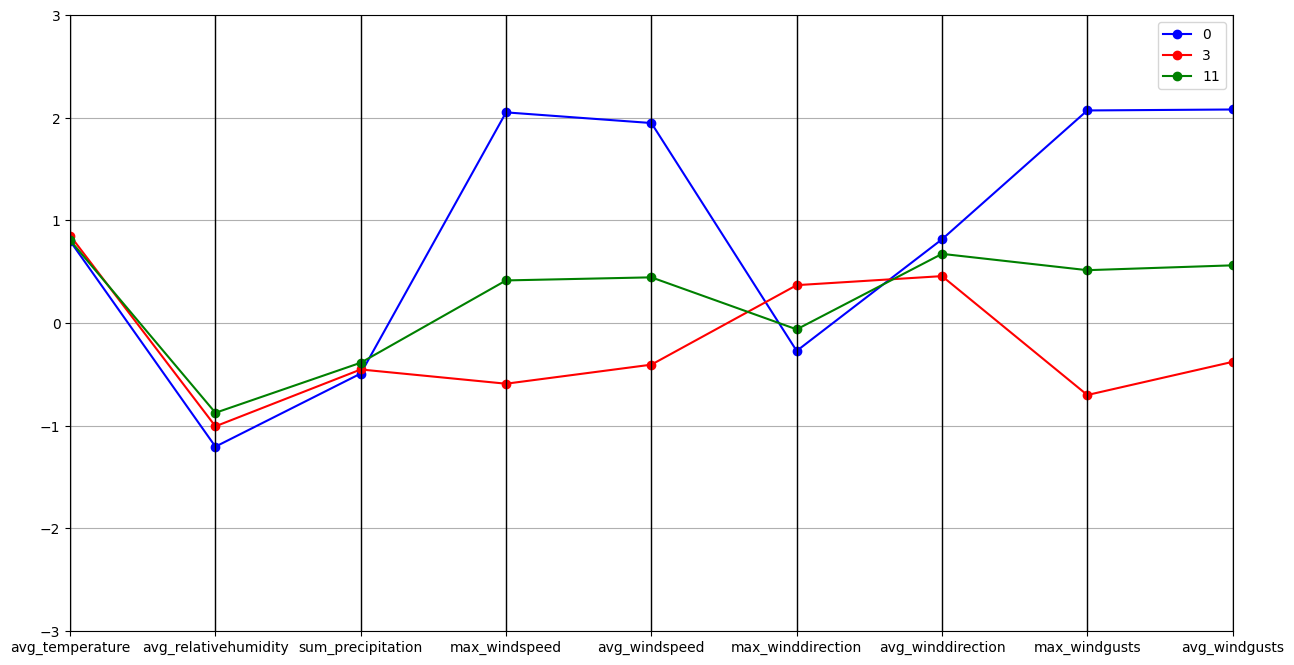

In [142]:
parallel_plot(P[P['avg_relativehumidity'] < -0.5])

# Warm Days

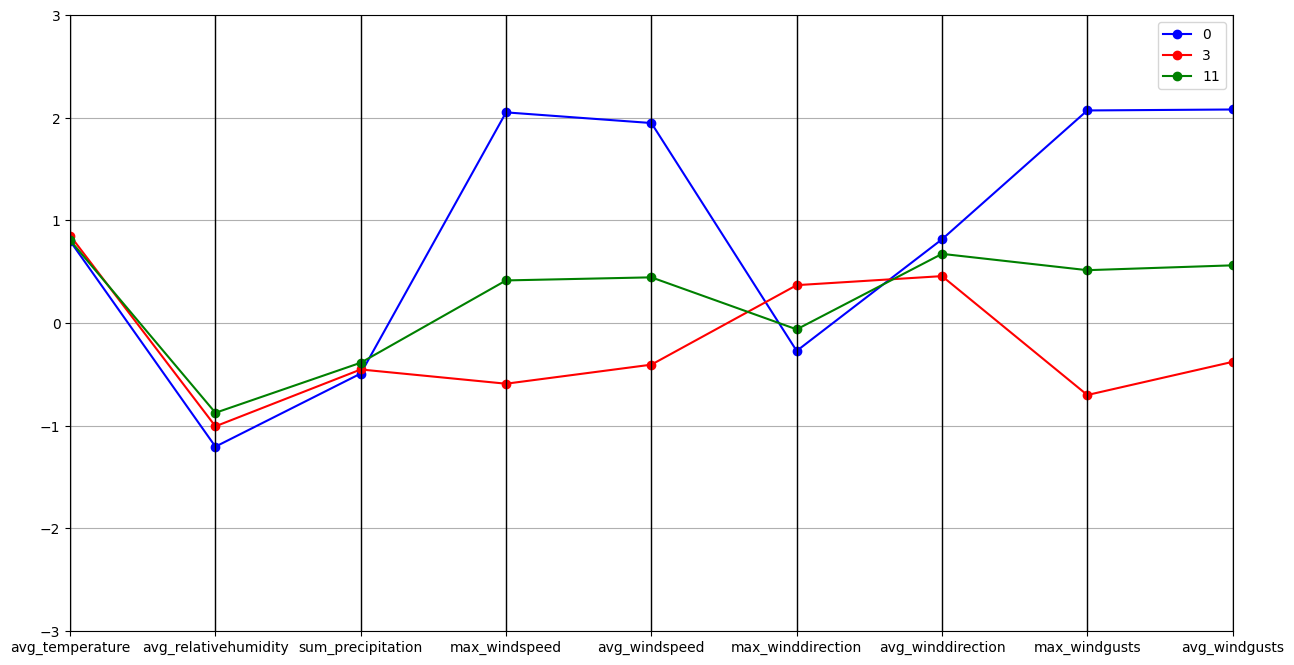

In [143]:
parallel_plot(P[ (P['avg_temperature'] > 0.5) &  (P['avg_relativehumidity'] < 0.5) ])

# Cool days 

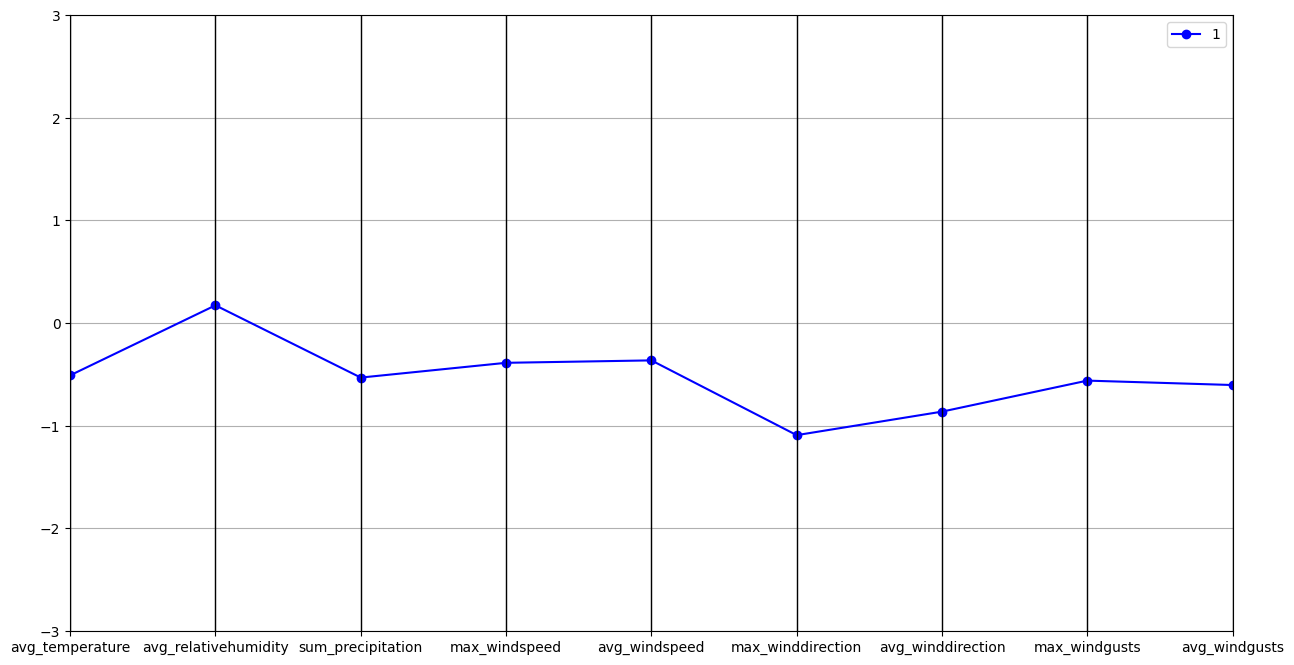

In [144]:
parallel_plot(P[ (P['avg_temperature'] < -0.5) &  (P['avg_relativehumidity'] < 0.5) ])